In [1]:
import os
import matplotlib.pyplot as plt
try:
	import gadget
except:
	print('couldnt import gadget!')
import numpy as np
import Param as param
import FigureMove as Fig
import auxiliary_functions as aux
import importlib
importlib.reload(aux)
importlib.reload(Fig)

[100, 150] [0.5, 0.5, 0.5] [1.0, 1.0, 1.0]


<module 'FigureMove' from '/home/kristian/analysis/analyze_bubblepaper/FigureMove.py'>

In [2]:
folder = '/home/kristian/analysis/TestSim/R7E45X5M1ASFCMy15/'
# folder = '/home/kristian/Analysis/SnapsTest/PerseusCorrect/R7/E45/X5M1ASFCMy15Ver2020Up10p3p2020/output/'
snap = Fig.quickImport(10, folder=folder)
print(snap.boxsize, snap.center)

/home/kristian/analysis/TestSim/R7E45X5M1ASFCMy15//snap_010.hdf5
generalInfo time:  50.4 Myr
1.4925373134328357 [0.74626866 0.74626866 0.74626866]


In [8]:
print('smallest grid cell dx=%g' %np.min(snap.vol**(1/3)))
N = 1024
print('largest box size to resolve grid assuming N=%i, L=%g' %(N, np.min(snap.vol**(1/3))*N))
N = 64
print('largest box size to resolve grid assuming N=%i, L=%g' %(N, np.min(snap.vol**(1/3))*N))

smallest grid cell dx=0.000550042
largest box size to resolve grid assuming N=1024, L=0.563243
largest box size to resolve grid assuming N=64, L=0.0352027


In [9]:
INFO = {}
INFO['constBXB'] = 0.05
snap.data['SqrtConsEpsB'] = aux.get_value('SqrtAbsoluteConstantMagneticFieldEnergyDensity', snap, INFO=INFO)
snap.data['SqrtEpsB'] = aux.get_value('SqrtMagneticFieldEnergyDensity', snap, INFO=INFO)
snap.data['DistInKpc'] = aux.get_value('DistanceToCenterInKpc', snap, INFO=INFO)

SqrtAbsoluteConstantMagneticFieldEnergyDensity
const B field: X_B=0.05
considering constant magnetic field with x_B=0.05 taking density/temperature from /home/kristian/analysis/analyze_bubblepaper/Data/ICProfile/IC_profile_Perseus_R_rho_u_codeunits.txt
using center of snapshot
(0.00030003398198746867, 0.000300029902990299)
(0.00030003398198746867, 0.000300029902990299)


/home/kristian/analysis/analyze_bubblepaper/auxiliary_functions.py:438: UserWarning: dx cannot be larger than d_radius
  warnings.warn('dx cannot be larger than d_radius')


SqrtMagneticFieldEnergyDensity
DistanceToCenterInKpc
using following center to calculate distance to center:
[746.2686567164178, 746.2686567164178, 746.2686567164178]
pos max 1492.53 min 0.00142909


In [10]:
bin_centresSqrtEpsB, statisticSqrtEpsB, ErrbarSqrtEpsB = Fig.do_Radprof(snap,snap.data['SqrtEpsB'],weight=snap.data['vol'],range=[None,None],log=False,NBins=100,typeCalc='mean',errbar='percentiles', return_binedges=False, SameNumberPointsPerBin=False, return_errbar=1, v=0)
bin_centresSqrtConsEpsB, statisticSqrtConsEpsB, ErrbarSqrtConsEpsB = Fig.do_Radprof(snap,snap.data['SqrtConsEpsB'],weight=snap.data['vol'],range=[None,None],log=False,NBins=100,typeCalc='mean',errbar='percentiles', return_binedges=False, SameNumberPointsPerBin=False, return_errbar=1, v=0)

INFO is None: set;  {'percentilesweightedLowerBoundary': 0.1, 'percentilesweightedUpperBoundary': 0.9, 'percentilesLowerBoundary': 0.1, 'percentilesUpperBoundary': 0.9}
INFO is None: set;  {'percentilesweightedLowerBoundary': 0.1, 'percentilesweightedUpperBoundary': 0.9, 'percentilesLowerBoundary': 0.1, 'percentilesUpperBoundary': 0.9}


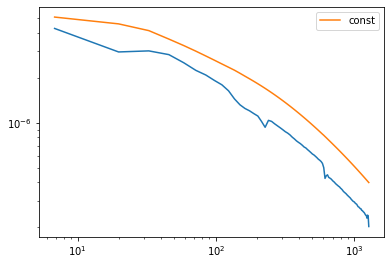

In [11]:
fig = plt.figure()
ax = plt.axes([0.15,0.15,0.8,.8])
ax.plot(bin_centresSqrtEpsB, statisticSqrtEpsB)
ax.plot(bin_centresSqrtConsEpsB, statisticSqrtConsEpsB, label='const')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()


In [12]:
snap.data['Pth'] = aux.get_value('ThermalPressure', snap, INFO=INFO)
bin_centresPth, statisticPth, ErrbarPth = Fig.do_Radprof(snap,snap.data['Pth'],weight=snap.data['vol'],range=[None,None],log=False,NBins=100,typeCalc='mean',errbar=None, return_binedges=False, SameNumberPointsPerBin=False, return_errbar=1)


ThermalPressure
('weight', array([1.76530499e-07, 1.58061394e-07, 1.70517038e-07, ...,
       1.93824766e-07, 2.94339054e-07, 2.81262762e-07]))
('weight', ':min', 1.6641350864382975e-10)
('weight', ':max', 2.0960379741853658e-06)
('weight', ':average', 5.135084504182192e-07)
('weight', ':mean', 5.135084504182192e-07)
('weight', ':shape', (6474824,))
INFO is None: set;  {'percentilesweightedLowerBoundary': 0.1, 'percentilesweightedUpperBoundary': 0.9, 'percentilesLowerBoundary': 0.1, 'percentilesUpperBoundary': 0.9}
statistics ['mean']


In [13]:
res = 64
ProjBox = 0.035
dist = Fig.getAgrid(snap, 'DistInKpc', res=res, ProjBox=ProjBox, verbose=0)

using boxsize/2 as center for grid!
center [0.7462686567164178, 0.7462686567164178, 0.7462686567164178]


In [14]:
field = Fig.getAgrid(snap, 'SqrtConsEpsB', res=res, ProjBox=ProjBox, verbose=0)
fieldWeights = Fig.getAgrid(snap, 'vol', res=res, ProjBox=ProjBox, verbose=0)
xConstBinned, yConstBinned, errConstBinned = Fig.do_Radprof(dist, field, weight=fieldWeights, range=[None,None], log=False, NBins=100, typeCalc='mean',errbar='percentiles', return_binedges=False, SameNumberPointsPerBin=False, return_errbar=1, v=0)

using boxsize/2 as center for grid!
center [0.7462686567164178, 0.7462686567164178, 0.7462686567164178]
using boxsize/2 as center for grid!
center [0.7462686567164178, 0.7462686567164178, 0.7462686567164178]
INFO is None: set;  {'percentilesweightedLowerBoundary': 0.1, 'percentilesweightedUpperBoundary': 0.9, 'percentilesLowerBoundary': 0.1, 'percentilesUpperBoundary': 0.9}


In [15]:
field = Fig.getAgrid(snap, 'SqrtEpsB', res=res, ProjBox=ProjBox, verbose=0)
fieldWeights = Fig.getAgrid(snap, 'vol', res=res, ProjBox=ProjBox, verbose=0)
dist = Fig.getAgrid(snap, 'DistInKpc', res=res, ProjBox=ProjBox, verbose=0)
xBinned, yBinned, errBinned = Fig.do_Radprof(dist, field, weight=fieldWeights, range=[None,None], log=False, NBins=100, typeCalc='mean',errbar='percentiles', return_binedges=False, SameNumberPointsPerBin=False, return_errbar=1, v=0)

using boxsize/2 as center for grid!
center [0.7462686567164178, 0.7462686567164178, 0.7462686567164178]
using boxsize/2 as center for grid!
center [0.7462686567164178, 0.7462686567164178, 0.7462686567164178]
using boxsize/2 as center for grid!
center [0.7462686567164178, 0.7462686567164178, 0.7462686567164178]
INFO is None: set;  {'percentilesweightedLowerBoundary': 0.1, 'percentilesweightedUpperBoundary': 0.9, 'percentilesLowerBoundary': 0.1, 'percentilesUpperBoundary': 0.9}


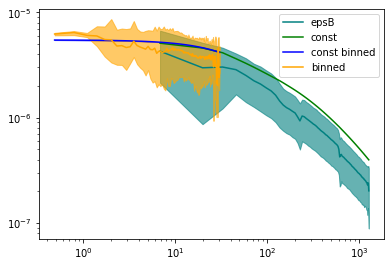

In [16]:
fig = plt.figure()
ax = plt.axes([0.15,0.15,0.8,.8])
ax.plot(bin_centresSqrtEpsB, statisticSqrtEpsB, color='teal', label='epsB')
plot = ax.fill_between(bin_centresSqrtEpsB, ErrbarSqrtEpsB[0], ErrbarSqrtEpsB[1], alpha=0.6, color='teal')            
ax.plot(bin_centresSqrtConsEpsB, statisticSqrtConsEpsB, color='green', label='const')
plot = ax.fill_between(xConstBinned, errConstBinned[0], errConstBinned[1], alpha=0.6, color='blue')            
plot = ax.plot(xConstBinned, yConstBinned, color='blue', label='const binned')
plot = ax.fill_between(xBinned, errBinned[0], errBinned[1], alpha=0.6, color='orange')            
plot = ax.plot(xBinned, yBinned, color='orange', label='binned')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

## Pressure Potential 1D

In [17]:
def getFunctionY(x, a, b, c):
    return a*(1.+(x/b)**2)**(-c)
def getFunction(x, a, b, c):
    return x, getFunctionY(x, a, b, c)
def getFunctionDeriv(x, a, b, c):
    return -(2*a*c*x*(1 + x^2/b^2)^(-1-c))/b^2
def getFTFunction(ks, a, b, c):
	import scipy.special
	#assumes profile in real space: a*(1+(x/b)^2)^(-c)
# 	print('PressureFourierTransTheoretical: assuming units(distance); cm')
	return ks, 2**(1.-c)*a/(b**2)**(-1./4.-c/2.)*abs(ks)**(-1./2.+c)*scipy.special.kv(1./2.-c, np.array(abs(ks)*abs(b)), dtype=np.complex)/scipy.special.gamma(np.complex(c))

$P(x)=a\left(1+\left(\frac{x}{b}\right)^2\right)^{-c} \\
P^\prime(x)=-\frac{2 a c x \left(1 + \left(\frac{x}{b}\right)^2\right)^{(-1 - c)}}{b^2} \\
\hat{P}(k)=\frac{2^{1-c}{a}{b^{2\left(\frac{1}{4}+\frac{c}{2}\right)}}|k|^{-\frac{1}{2}+c} K_v\left(\frac{1}{2}-c,k|b|\right)}{\Gamma(c)}$

In [18]:
import scipy.optimize

In [19]:
# print(bin_centresSqrtConsEpsB, statisticSqrtConsEpsB) bin_centresSqrtConsEpsB, statisticSqrtConsEpsB,
# paras, success = aux.fitFunction(bin_centresSqrtConsEpsB, statisticSqrtConsEpsB, [5e-6, 40., 1.], getFunctionY, alternative=False)
paras, success = scipy.optimize.curve_fit(getFunctionY, bin_centresSqrtConsEpsB, statisticSqrtConsEpsB, p0=[5e-6, 50., 0.4], sigma=None, 
                                          bounds=(np.array([1e-6,1,0]),np.array([1e-5,100,4.])),
                                         maxfev=10000000000) 
paras, success = scipy.optimize.curve_fit(getFunctionY, snap.data['DistInKpc'], snap.data['SqrtEpsB'], p0=[5e-6, 50., 0.4], sigma=None, 
                                          bounds=(np.array([1e-6,1,0]),np.array([1e-5,100,4.])),
                                         maxfev=10000000000) 

In [20]:
perror = np.sqrt(np.diag(success)) 
paras,perror

(array([3.49603223e-06, 4.90422610e+01, 3.80485135e-01]),
 array([1.60799570e-09, 6.12722456e-02, 1.57991907e-04]))

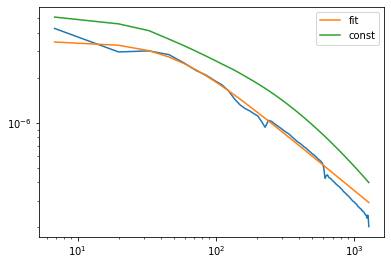

In [21]:
fig = plt.figure()
ax = plt.axes([0.15,0.15,0.8,.8])
ax.plot(bin_centresSqrtEpsB, statisticSqrtEpsB)
ax.plot(bin_centresSqrtEpsB, getFunctionY(bin_centresSqrtEpsB, *paras), label='fit')
ax.plot(bin_centresSqrtConsEpsB, statisticSqrtConsEpsB, label='const')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

In [22]:
functionReal = lambda x,p: getFunction(x, *p)
functionFourier = lambda x,p: getFTFunction(x, *p)

## Start with Fourier code

/home/kristian/analysis/TestSim/R7E45X5M1ASFCMy15//snap_010.hdf5
generalInfo time:  50.4 Myr
1.4925373134328357 [0.74626866 0.74626866 0.74626866]
(1000, 3)
working on snap!!!!!!!!!!!!!!!
initializeKVectors
redid something in initializeKVectors
initializeXVectors
SqrtAbsoluteConstantMagneticFieldEnergyDensity
const B field: X_B=0.05
considering constant magnetic field with x_B=0.05 taking density/temperature from /home/kristian/analysis/analyze_bubblepaper/Data/ICProfile/IC_profile_Perseus_R_rho_u_codeunits.txt
using center of snapshot
(0.00030003398198746867, 0.000300029902990299)
(0.00030003398198746867, 0.000300029902990299)
Generating grids: resolution grid 0.1, resolution snap 0.000550042
using boxsize/2 as center for grid!
center [0.7462686567164178, 0.7462686567164178, 0.7462686567164178]
(1000,)
(10, 10, 10)
{'spaceDim': 3, 'fieldDim': 1, 'n': [10, 10, 10], 'delta': [0.1, 0.1, 0.1], 'n_pad': [0, 0, 0], 'realFT': False, 'snapName': '/home/kristian/analysis/TestSim/R7E45X5M1ASFCM

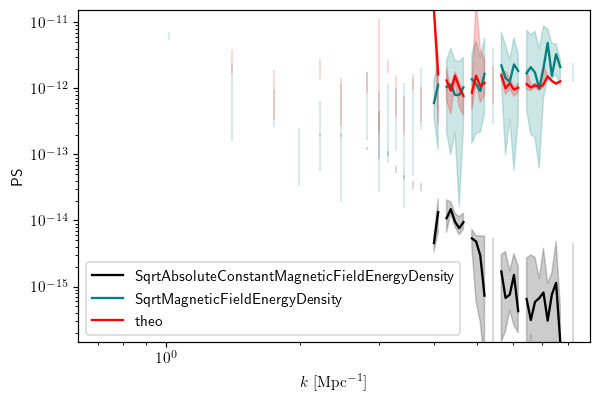

In [36]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 110
import os
import matplotlib.pyplot as plt
try:
	import gadget
except:
	print('couldnt import gadget!')
import numpy as np
import Param as param
import FigureMove as Fig
import auxiliary_functions as aux
import importlib
importlib.reload(aux)
importlib.reload(Fig)
import FourierClass as FC
import importlib
import TheorySnapClass as TS
importlib.reload(FC)
folder = '/home/kristian/analysis/TestSim/R7E45X5M1ASFCMy15/'
# folder = '/home/kristian/Analysis/SnapsTest/PerseusCorrect/R7/E45/X5M1ASFCMy15Ver2020Up10p3p2020/output/'
snap = Fig.quickImport(10, folder=folder)
print(snap.boxsize, snap.center)
box = 1.
n = 10
snapTheo = TS.TheorySnapShot(n=n, boxsize=box, spaceDim=3)

spaceDim, fieldDim, n, delta = 3, 1, n, box/n
loadPlotData = False
savePlotData = True
xlog = ylog = True
fig, ax = plt.subplots()
ft = FC.FTObj(spaceDim=3, fieldDim=1, n=n, delta=box/n)
ft.plotFT(coordinate='kAbs', snap=snap, variable='SqrtAbsoluteConstantMagneticFieldEnergyDensity', ax=ax, savePlot=True, loadPlotData=loadPlotData,
          plotVariableInKspace=True, xlog=xlog, ylog=ylog,label='SqrtAbsoluteConstantMagneticFieldEnergyDensity')
ft.plotFT(coordinate='kAbs', snap=snap, variable='SqrtMagneticFieldEnergyDensity', ax=ax, savePlot=True, loadPlotData=loadPlotData,
           plotVariableInKspace=True, xlog=xlog, ylog=ylog, color='teal',label='SqrtMagneticFieldEnergyDensity')
ftT = FC.FTObj(spaceDim=3, fieldDim=1, n=n, delta=box/n)
ftT.plotFT(coordinate='kAbs', snap=snapTheo, variable='SqrtAbsoluteConstantMagneticFieldEnergyDensity', ax=ax, savePlot=True, loadPlotData=loadPlotData,
          plotVariableInKspace=True, xlog=xlog, ylog=ylog,label='theo',color='red')

ax.legend()

In [43]:
np.abs(snap.pos).min(), np.abs(snapTheo.data['pos']).min()

(1.4290912e-06, 1.1102230246251565e-16)

In [54]:
snap.data['DIST'] = aux.get_DistanceToCenterInKpc(snap)
snapTheo.data['DIST'] = aux.get_DistanceToCenterInKpc(snap)

using following center to calculate distance to center:
[746.2686567164178, 746.2686567164178, 746.2686567164178]
pos max 1492.53 min 0.00142909
using following center to calculate distance to center:
[746.2686567164178, 746.2686567164178, 746.2686567164178]
pos max 1492.53 min 0.00142909


In [58]:
snap.data['Econ'] = aux.get_value('SqrtAbsoluteConstantMagneticFieldEnergyDensity', snap)
snapTheo.data['Econ'] = aux.get_value('SqrtAbsoluteConstantMagneticFieldEnergyDensity', snapTheo)

SqrtAbsoluteConstantMagneticFieldEnergyDensity
const B field: X_B=0.05
considering constant magnetic field with x_B=0.05 taking density/temperature from /home/kristian/analysis/analyze_bubblepaper/Data/ICProfile/IC_profile_Perseus_R_rho_u_codeunits.txt
using center of snapshot
(0.00030003398198746867, 0.000300029902990299)
(0.00030003398198746867, 0.000300029902990299)
SqrtAbsoluteConstantMagneticFieldEnergyDensity
const B field: X_B=0.05
considering constant magnetic field with x_B=0.05 taking density/temperature from /home/kristian/analysis/analyze_bubblepaper/Data/ICProfile/IC_profile_Perseus_R_rho_u_codeunits.txt
using center of snapshot


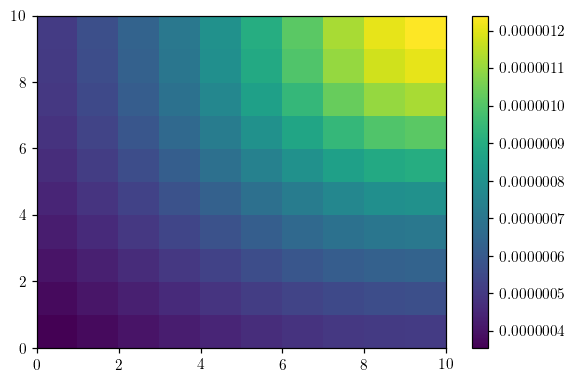

In [63]:
im = plt.pcolormesh(snapTheo.data['Econ'].reshape(n,n,n)[:,int(n/2),:])
plt.colorbar(im)

In [82]:
import TheorySnapClass as TS
importlib.reload(TS)
box = 1.
n = 10
snapTheo = TS.TheorySnapShot(n=n, boxsize=box, spaceDim=3)
gridTheo = Fig.getAgrid(snapTheo, 'Econ', res=[n,n,n], ProjBox=[box]*3, numthreads=16, verbose=0)


(1000, 3)


AttributeError: 'TheorySnapShot' object has no attribute 'nparticlesall'

In [65]:
grid = Fig.getAgrid(snap, 'Econ', res=[n,n,n], ProjBox=[box]*3, numthreads=16, verbose=0)


using boxsize/2 as center for grid!
center [0.7462686567164178, 0.7462686567164178, 0.7462686567164178]


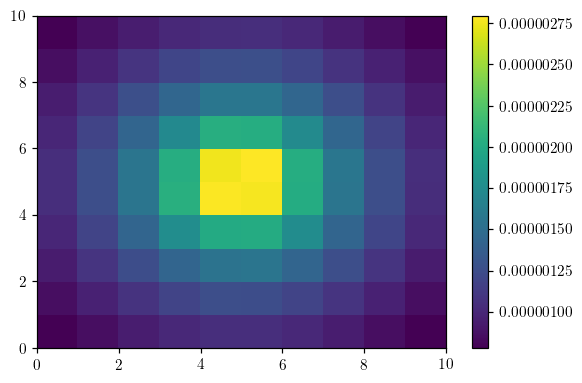

In [73]:
im = plt.pcolormesh(grid[:,int(n/2),:])
plt.colorbar(im)

In [5]:
ft.rspace()
fig, ax = plt.subplots()
xvalues = ft.xAbs.flatten()
yvalues = abs(ft.field.flatten())
# ax.scatter(xvalues, yvalues, alpha=0.2, color='grey')
x,y,err = Fig.do_Radprof(xvalues, yvalues, log=True, NBins=30, return_errbar=1)
ax.plot(bin_centresSqrtEpsB/1e3, getFunctionY(bin_centresSqrtEpsB, *paras), color='red', label='fit')
ft.plotFT(coordinate='xAbs', snap=snap, variable='SqrtMagneticFieldEnergyDensity', ax=ax, savePlot=False, loadPlotData=loadPlotData, savePlotData=savePlotData,
          plotVariableInKspace=False, xlog=xlog, ylog=ylog, color='teal', powerspec=False, absolute=False)
ft.plotFT(coordinate='xAbs', snap=snap, variable='SqrtAbsoluteConstantMagneticFieldEnergyDensity', ax=ax, savePlot=False, loadPlotData=loadPlotData, savePlotData=savePlotData,
          plotVariableInKspace=False, xlog=xlog, ylog=ylog, color='lightblue', powerspec=False, absolute=False)
Fig.plotErrorbar(ax, err, x)
Fig.modifyPlot(ax, ylog=True, xlog=True)
#abs(ft.field.flatten())

AttributeError: 'FTObj' object has no attribute 'statusField'

initializeKVectors
redid something in initializeKVectors
initializeXVectors
using boxsize/2 as center for grid!
center [0.7462686567164178, 0.7462686567164178, 0.7462686567164178]


/home/kristian/analysis/analyze_bubblepaper/FigureMove.py:4098: UserWarning: do_Radprof: setting MIN from 0 to 0.0078125 to use log
  warnings.warn('do_Radprof: setting MIN from %g to %g to use log' %(minEarly,MIN))


... saved ../figures/DataPlots/PW_Si/home/kristian/analysis/TesSi/R7E45X5M1ASFCMy15//snap_010phdf5_VaSqrMagnFielEnerDens_FieTyGri_PS0_TyCalm_NBi100_n128_delta0p0078_18.hdf5
.. saving ../figures/test.pdf


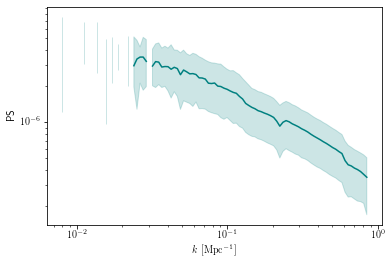

In [91]:
fig, ax = plt.subplots()
ft = FC.FTObj(spaceDim=3, fieldDim=1, n=n, delta=box/n)

ft.plotFT(coordinate='xAbs', snap=snap, variable='SqrtMagneticFieldEnergyDensity', ax=ax, savePlot=True, loadPlotData=loadPlotData,
          plotVariableInKspace=False, xlog=xlog, ylog=ylog, color='teal', powerspec=False, absolute=False)
